# Kinematic Bicycle Model Derivation

<img src="kinematic_model.jpg" align="left" width="350"/> 

### Slip Angle $\beta$
<img src="slip_angle_beta.jpg" align="left" width="500"/> 

### Yaw Rate $\dot{\psi}$
<img src="yaw_rate.jpg" align="left" width="300"/> 

### Equations of Motion
<img src="eom.jpg" align="left" width="300"/>

# Example - Driving In Circle

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from dynamics.kinematic_model import CartesianKinematicBicycleModel, MotionModel
from dynamics.CartesianDynamicBicycleModel import CartesianDynamicBicycleModel
from dynamics.Vehicle import Vehicle
from utils import math

pygame 2.3.0 (SDL 2.24.2, Python 3.11.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


<IPython.core.display.Javascript object>


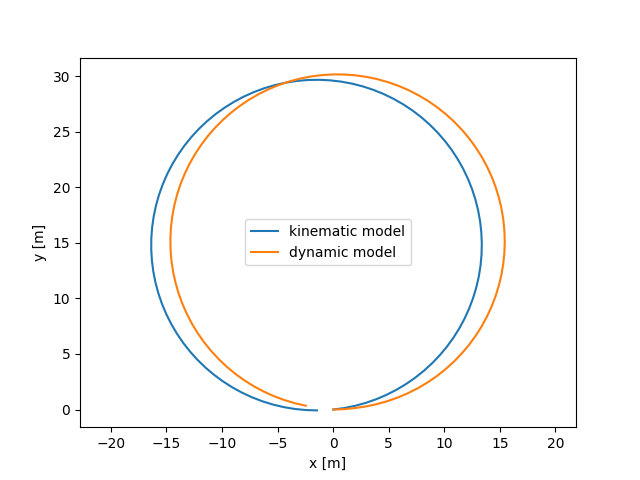

In [2]:
road_wheel_angle = 0.2
vel_mps = 10
dt = 0.1

vehicle_state_init = Vehicle().build_pose(math.Pose(x=0,y=0,theta=0)).build_vel(vel=vel_mps, beta=0)
# time to complete 1 loop of circle
t_final = 2*np.pi*vehicle_state_init.params.wheel_base/(np.tan(road_wheel_angle)*vel_mps)
t_array = np.arange(start=0, stop=t_final, step=dt)

kinematic_model = CartesianKinematicBicycleModel(MotionModel.IntScheme.RK4)
dynamic_model = CartesianDynamicBicycleModel(MotionModel.IntScheme.RK4)

# integrate
kinematic_states = [vehicle_state_init]
dynamic_states = [vehicle_state_init]
for idx in range(len(t_array)-1):
    kinematic_states.append(kinematic_model.update(kinematic_states[-1], steer=road_wheel_angle, vel=vel_mps, dt=dt))
    dynamic_states.append(dynamic_model.update(dynamic_states[-1], steer=road_wheel_angle, vel=vel_mps, dt=dt))

# plot
fig, ax = plt.subplots()
ax.plot([z.pose.x for z in kinematic_states], [z.pose.y for z in kinematic_states], label="kinematic model")
ax.plot([z.pose.x for z in dynamic_states], [z.pose.y for z in dynamic_states], label="dynamic model")
ax.axis('equal')
ax.set_xlabel("x [m]")
ax.set_ylabel("y [m]")
ax.legend();

### Reference
> [Polack, Philip & Altché, Florent & Novel, Brigitte & de La Fortelle, Arnaud. (2017). The kinematic bicycle model: A consistent model for planning feasible trajectories for autonomous vehicles?. 812-818. 10.1109/IVS.2017.7995816.](https://www.researchgate.net/publication/318810853_The_kinematic_bicycle_model_A_consistent_model_for_planning_feasible_trajectories_for_autonomous_vehicles)